# **Function to make stacked image**

In [4]:
## TO STACK ALL THE IMAGES IN ONE WINDOW
def stackImages(imgArray, scale, lables=[]):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range(0, rows):
            for y in range(0, cols):
                imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y] = cv2.cvtColor(imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank] * rows
        hor_con = [imageBlank] * rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
            hor_con[x] = np.concatenate(imgArray[x])
        ver = np.vstack(hor)
        ver_con = np.concatenate(hor)
    else:
        for x in range(0, rows):
            imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor = np.hstack(imgArray)
        hor_con = np.concatenate(imgArray)
        ver = hor
    if len(lables) != 0:
        eachImgWidth = int(ver.shape[1] / cols)
        eachImgHeight = int(ver.shape[0] / rows)
        for d in range(0, rows):
            for c in range(0, cols):
                cv2.rectangle(ver, (c * eachImgWidth, eachImgHeight * d),
                              (c * eachImgWidth + len(lables[d][c]) * 13 + 27, 30 + eachImgHeight * d), (255, 255, 255),
                              cv2.FILLED)
                cv2.putText(ver, lables[d][c], (eachImgWidth * c + 10, eachImgHeight * d + 20),
                            cv2.FONT_HERSHEY_COMPLEX, 0.7, (255, 0, 255), 2)
    return ver

# Background Remover Application

In [5]:
import cv2
import numpy as np

def fun(x):
    pass

img_path = "maxresdefault.jpg"

cv2.namedWindow("trackbar")
cv2.createTrackbar("thresh","trackbar",50,255, fun)
cv2.createTrackbar("blur"  ,"trackbar", 5, 10, fun)
cv2.createTrackbar("low"   ,"trackbar", 0, 50000, fun)
cv2.createTrackbar("high"  ,"trackbar", 50, 50000, fun)

while True:
    accepted = []
    
    # Update the image
    img = cv2.imread(img_path)
    
    # Resize the image into half size
#     img = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2))
    
    # Original Image
    orig = img.copy()
    
    # Convert it to greyscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Blur the image
    b = int(cv2.getTrackbarPos('blur','trackbar'))
    blur = cv2.blur(gray, (b, b))
    
    # Threshold the image
    r= int(cv2.getTrackbarPos('thresh','trackbar'))
    ret, thresh = cv2.threshold(blur,r,255,0)
    
    # Extracting the canny area
    canny = cv2.Canny(thresh, 100, 200)
    
    # Find the contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    
    low  = int(cv2.getTrackbarPos('low','trackbar'))
    high = int(cv2.getTrackbarPos('high','trackbar'))
    
    # For each contour, find the convex hull and draw it on the original image.
    for i in range(len(contours)):
        if low < cv2.contourArea(contours[i]) < high:
            hull = cv2.convexHull(contours[i])
            cv2.drawContours(img, [hull], -1, (255, 0, 0), 2)
            accepted = [hull]
    

    # Background
    bg =  np.zeros(orig.shape, np.uint8)
    bg = cv2.drawContours(bg, accepted, -1, (255,255,255),-1) 
    
    #Foreground
    fg = cv2.bitwise_not(bg)
    
    # Blur the Background
    bg = cv2.bitwise_and(bg, orig)
    
    # Merge Both blur background and good foreground
    fg = cv2.bitwise_and(fg, cv2.blur(orig, (10,10)))
    res = cv2.bitwise_or(fg, bg)
    
    imageArray = ([orig, gray, blur, thresh],
                  [canny, img, bg, res])

    # LABELS FOR DISPLAY
    lables = [["Original", "Gray", "Gray Blur", "Binary"],
              ["Threshold", "Edged", "Extracted Contour", "Result"]]

    # Result images in subplot
    stackedImage = stackImages(imageArray, 0.75, lables)
    
    stackedImage = cv2.resize(stackedImage, (stackedImage.shape[1]//2, stackedImage.shape[0]//2))
    
    # Display the image
    cv2.imshow("Result", stackedImage)
    key = cv2.waitKey(1)
    
    if key == ord('q'):
        cv2.imwrite("Result.jpg", res)
        break
        
cv2.destroyAllWindows()

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-efg5nnu5\opencv\modules\highgui\src\window.cpp:1257: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvNamedWindow'


In [4]:
import matplotlib.pyplot as plt

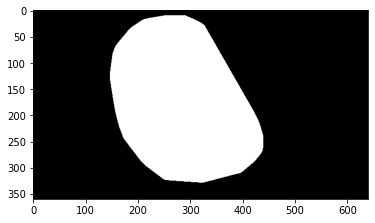

In [6]:
bg =  np.zeros(orig.shape, np.uint8)
bg = cv2.drawContours(bg, accepted, -1, (255,255,255),-1)
plt.imshow(bg)

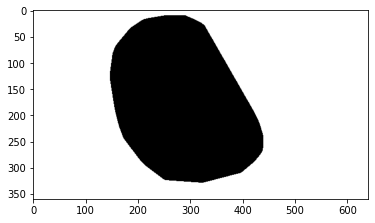

In [7]:
fg = cv2.bitwise_not(bg)
plt.imshow(fg)

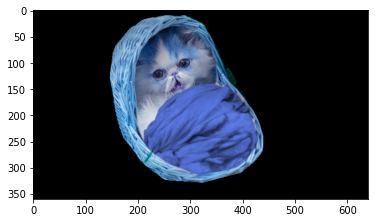

In [8]:
bg = cv2.bitwise_and(bg, orig)
plt.imshow(bg)

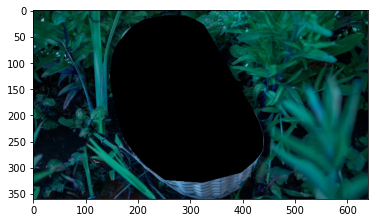

In [9]:
fg = cv2.bitwise_and(fg, orig)
plt.imshow(fg)

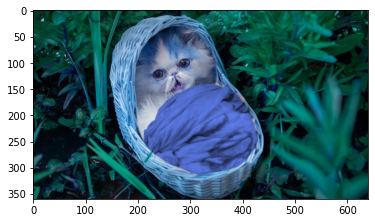

In [11]:
res = cv2.bitwise_or(fg, bg)
plt.imshow(res)

In [12]:
cv2.imshow("",res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFilter

RADIUS = 50

# Open an image
im = Image.open("cat.png")

# Paste image on white background
diam = 2*RADIUS
back = Image.new('RGB', (im.size[0]+diam, im.size[1]+diam), (255,255,255))
back.paste(im, (RADIUS, RADIUS))

# Create paste mask
mask = Image.new('L', back.size, 0)
draw = ImageDraw.Draw(mask)
x0, y0 = 0, 0
x1, y1 = back.size
for d in range(diam+RADIUS):
    x1, y1 = x1-1, y1-1
    alpha = 255 if d<RADIUS else int(255*(diam+RADIUS-d)/diam)
    draw.rectangle([x0, y0, x1, y1], outline=alpha)
    x0, y0 = x0+1, y0+1

# Blur image and paste blurred edge according to mask
blur = back.filter(ImageFilter.GaussianBlur(RADIUS/2))
back.paste(blur, mask=mask)
back.save("res.png")

In [9]:
import cv2
import numpy as np

# load image
img = cv2.imread('res.png')

# convert to graky
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold input image as mask
mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]

# negate mask
mask = 255 - mask

# apply morphology to remove isolated extraneous noise
# use borderconstant of black since foreground touches the edges
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# anti-alias the mask -- blur then stretch
# blur alpha channel
mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)

# linear stretch so that 127.5 goes to 0, but 255 stays 255
mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

# put mask into alpha channel
result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask

# save resulting masked image
cv2.imwrite('new.png', result)

# display result, though it won't show transparency
cv2.imshow("INPUT", img)
cv2.imshow("GRAY", gray)
cv2.imshow("MASK", mask)
cv2.imshow("RESULT", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-efg5nnu5\opencv\modules\highgui\src\window.cpp:1274: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
